In [ ]:
#librerias a usar

import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

!wget -O Mall_Customers.csv https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv
# Cargar datos
data = pd.read_csv("Mall_Customers.csv")

# Vista rápida de los datos
print(data.head())
print("\nInformación general:")
print(data.info())
print("\nEstadísticas descriptivas:")
print(data.describe())

--2025-02-14 20:24:26--  https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-02-14 20:24:27 (10.4 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Fema

In [ ]:
print("Media del ingreso mensual:",data['Annual Income (k$)'].loc[data['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",data['Annual Income (k$)'].loc[data['Gender'] == 'Male'].mean())

Media del ingreso mensual: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273



Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


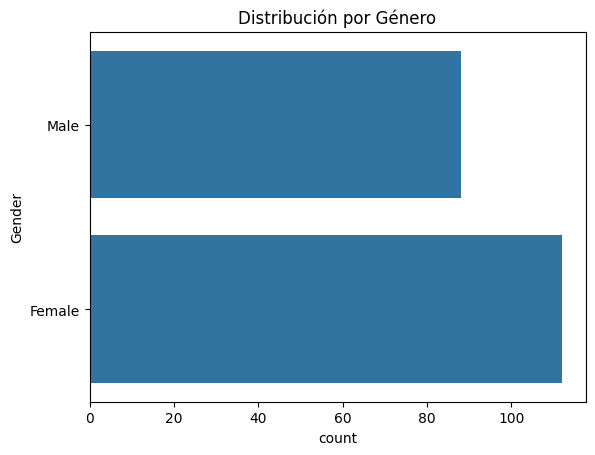

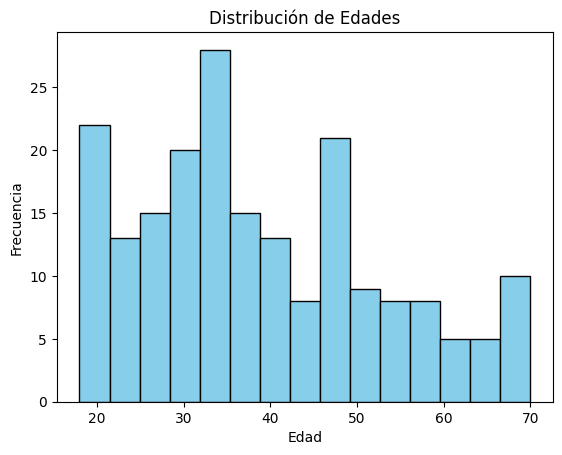

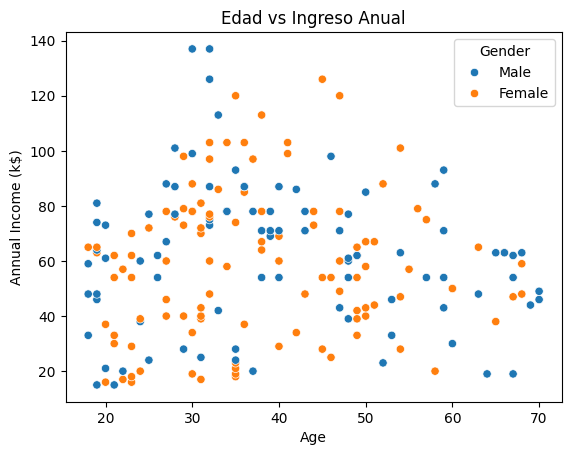

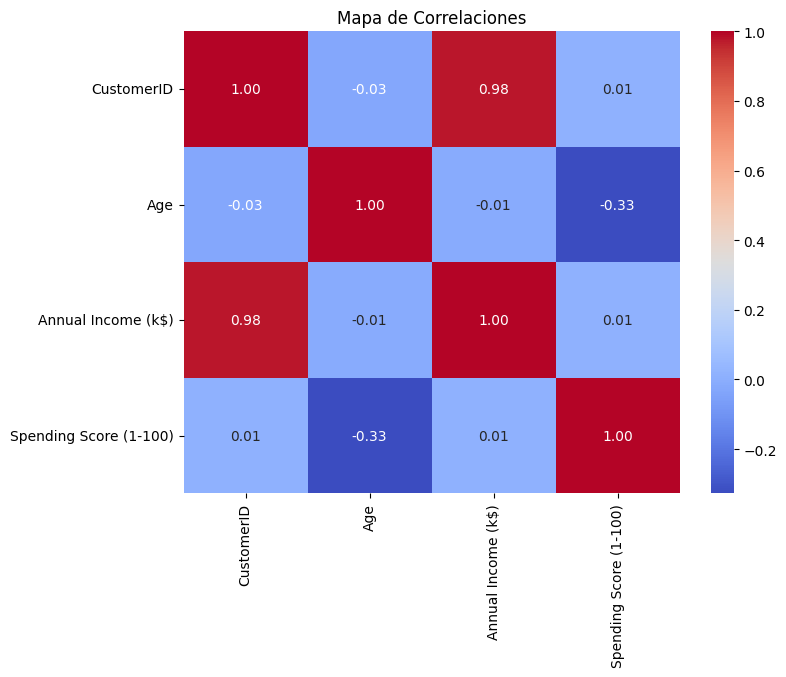

In [ ]:

# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Distribución de género
sns.countplot(data['Gender'])
plt.title("Distribución por Género")
plt.show()

# Histograma de las edades
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de dispersión: Edad vs Ingreso Anual
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender')
plt.title("Edad vs Ingreso Anual")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Crear el heatmap con solo datos numéricos
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlaciones")
plt.show()



The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

<Axes: ylabel='count'>

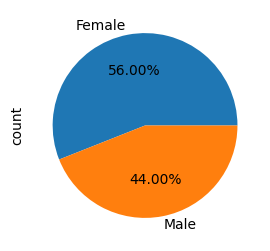

In [ ]:
plt.figure(figsize=(3,3))
pd.Series(data['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [ ]:
data.groupby('Gender').mean()
#Media de edad & ganancias

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


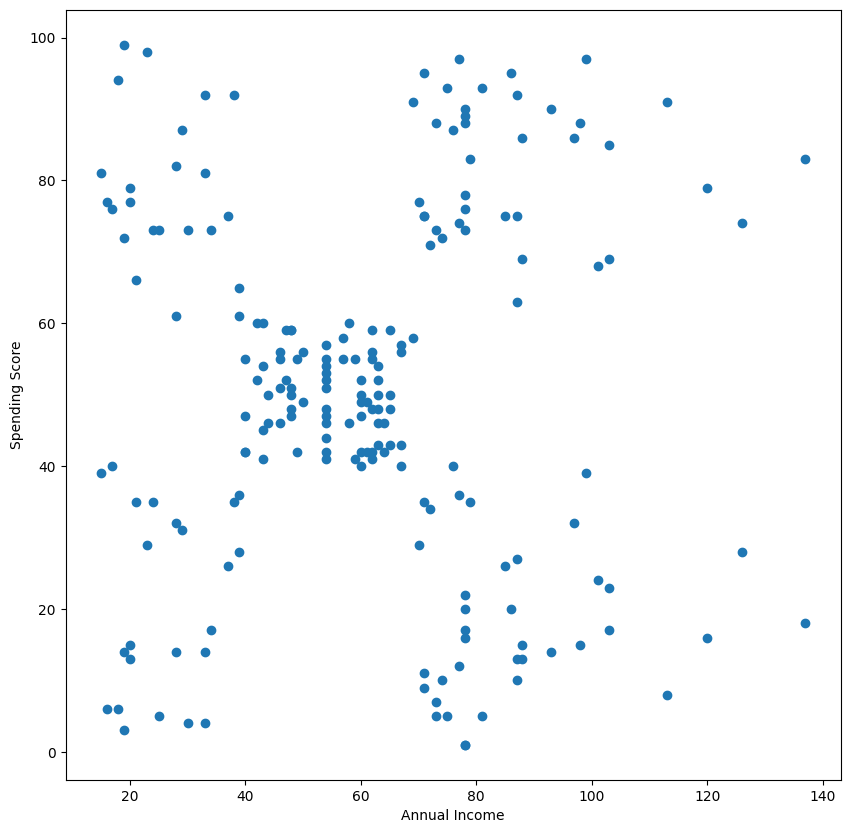

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

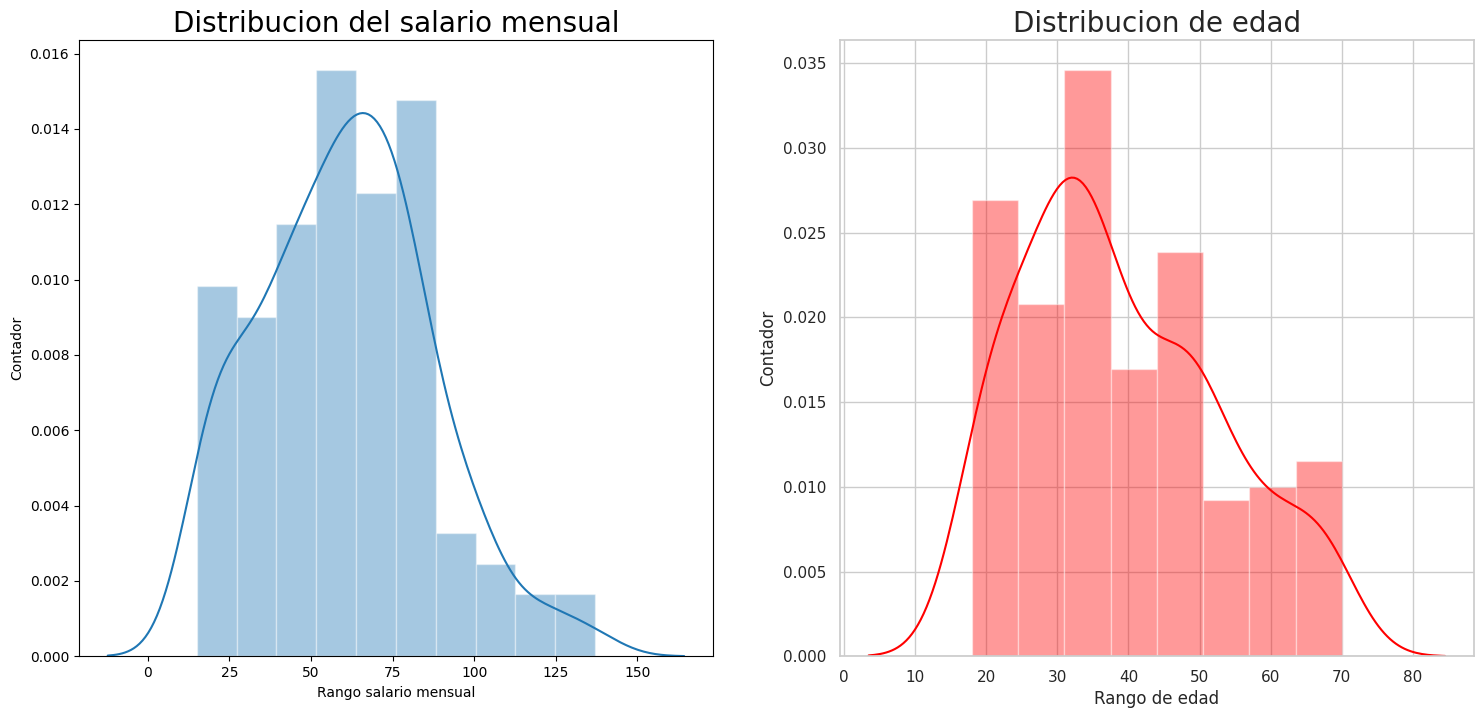

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribucion del salario mensual', fontsize = 20)
plt.xlabel('Rango salario mensual')
plt.ylabel('Contador')
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribucion de edad', fontsize = 20)
plt.xlabel('Rango de edad')
plt.ylabel('Contador')
plt.show()


En los gráficos anteriores se observa la distribución del ingreso anual y la edad de los clientes. A partir de estos datos, se pueden obtener algunas conclusiones:

Son pocas las personas que tienen un ingreso superior a 100 dólares.
La mayoría de los clientes ganan entre 50 y 75 dólares.
El ingreso más bajo registrado es de aproximadamente 20 dólares.
En cuanto a la edad de los clientes:

La mayor parte de los visitantes frecuentes del centro comercial tienen entre 30 y 35 años.
Las personas mayores son las que menos visitan el lugar.
Hay menos jóvenes en comparación con los adultos de mediana edad.

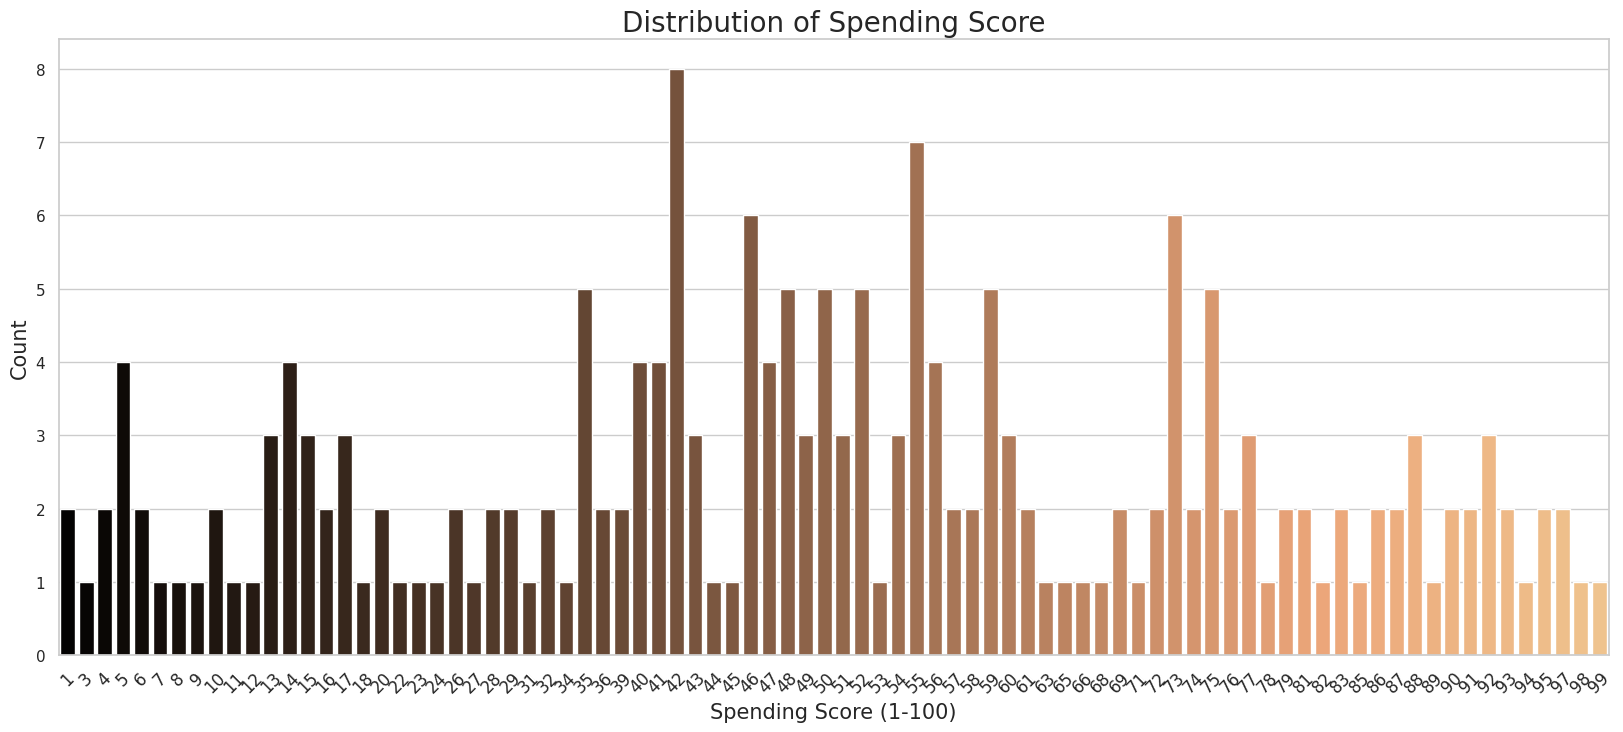

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que los datos sean categóricos
data['Spending Score (1-100)'] = pd.to_numeric(data['Spending Score (1-100)'], errors='coerce')

# Configurar tamaño de la figura
plt.rcParams['figure.figsize'] = (20, 8)

# Crear la gráfica
sns.countplot(x=data['Spending Score (1-100)'], palette='copper')

# Ajustar título y etiquetas
plt.title('Distribution of Spending Score', fontsize=20)
plt.xlabel('Spending Score (1-100)', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45, fontsize=12)

# Mostrar la gráfica
plt.show()


Este gráfico es fundamental desde la perspectiva del centro comercial, ya que permite obtener una idea clara sobre el nivel de gasto de los clientes que lo visitan.

En términos generales, se puede concluir que la mayoría de los clientes tienen un puntaje de gasto que oscila entre 35 y 60. Es interesante notar que también hay clientes con un puntaje de gasto tan bajo como 1 y otros con un puntaje tan alto como 99, lo que refleja que el centro comercial atiende a una amplia variedad de clientes con necesidades y preferencias muy diversas.

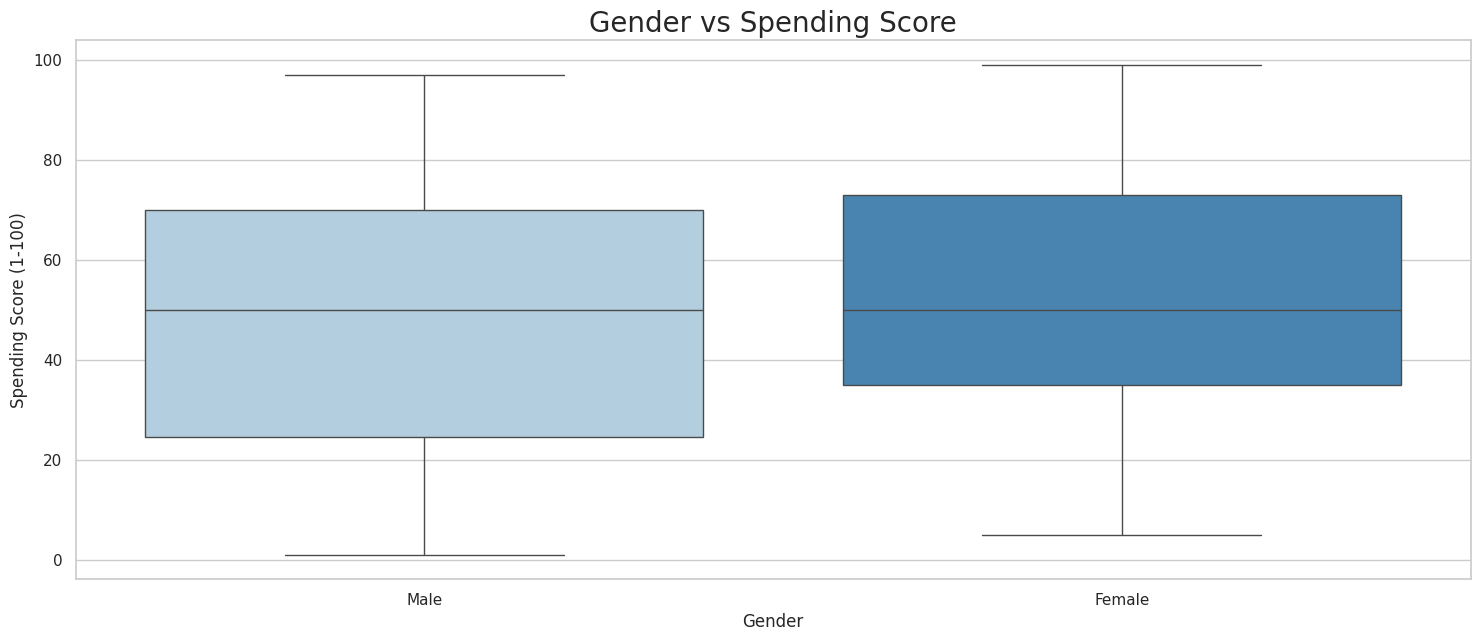

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura
plt.rcParams['figure.figsize'] = (18, 7)

# Crear el gráfico de caja
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Blues')

# Título de la gráfica
plt.title('Gender vs Spending Score', fontsize=20)

# Mostrar la gráfica
plt.show()




Es claramente visible que la mayoría de los hombres tienen un puntaje de gasto de alrededor de 25,000 a 70,000 dólares estadounidenses, mientras que las mujeres tienen un puntaje de gasto de aproximadamente 35,000 a 75,000 dólares. Esto nuevamente refuerza la idea de que las mujeres son las líderes en compras.

In [ ]:
X= data.iloc[:, [3,4]].values

Aquí consideraremos solo 2 características (Ingresos anuales y Puntuación de gasto) y no hay etiqueta disponible.

In [ ]:
from sklearn.cluster import KMeans
wcss = []  # Lista para almacenar la inercia de cada número de clústeres

# Suponemos que el número máximo de clústeres será 15
# Puedes evaluar el número de clústeres promediando
### Código estático para obtener el número máximo de clústeres

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)  # Entrenamos el modelo con los datos
    wcss.append(kmeans.inertia_)  # inertia_ es la fórmula utilizada para agrupar los puntos de datos en clústeres


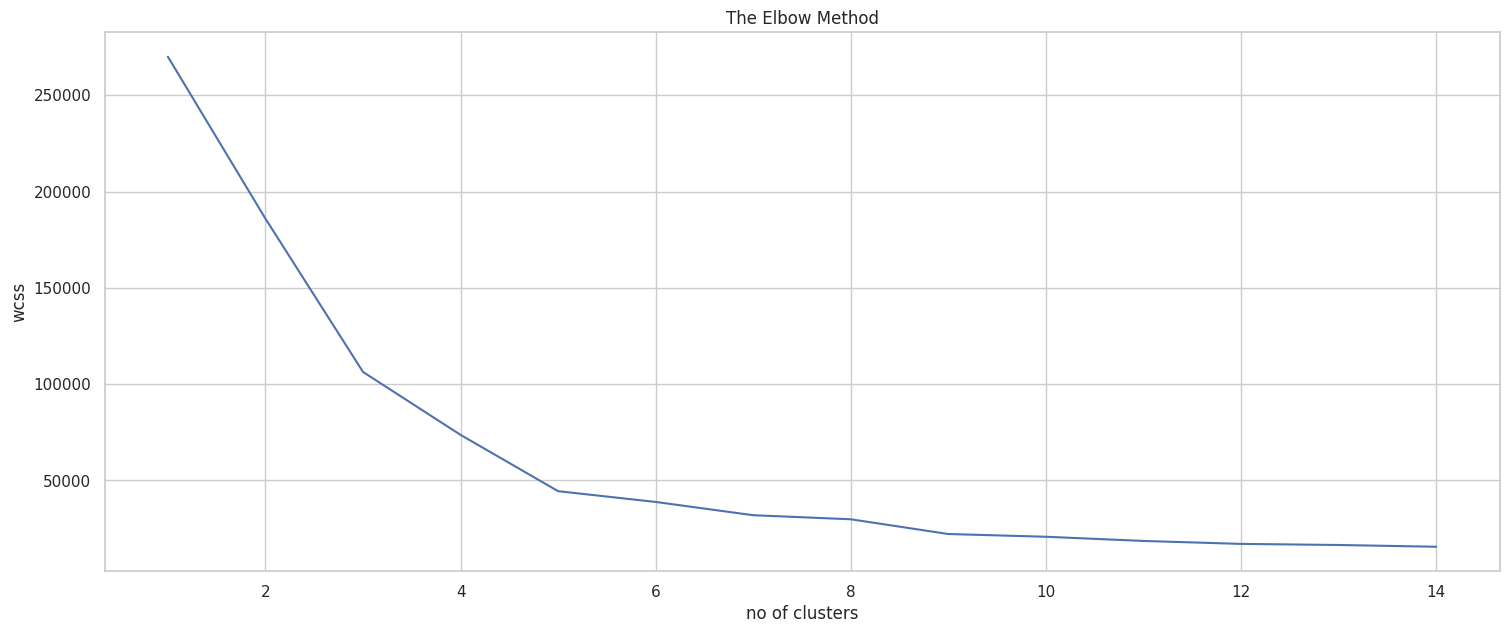

In [ ]:
plt.plot(range(1, 15), wcss)  # Grafica el número de clústeres contra el valor de la inercia (WCSS)
plt.title('The Elbow Method')  # Título del gráfico
plt.xlabel('no of clusters')  # Etiqueta para el eje X (número de clústeres)
plt.ylabel('wcss')  # Etiqueta para el eje Y (WCSS - Within-Cluster Sum of Squares)
plt.show()  # Muestra el gráfico


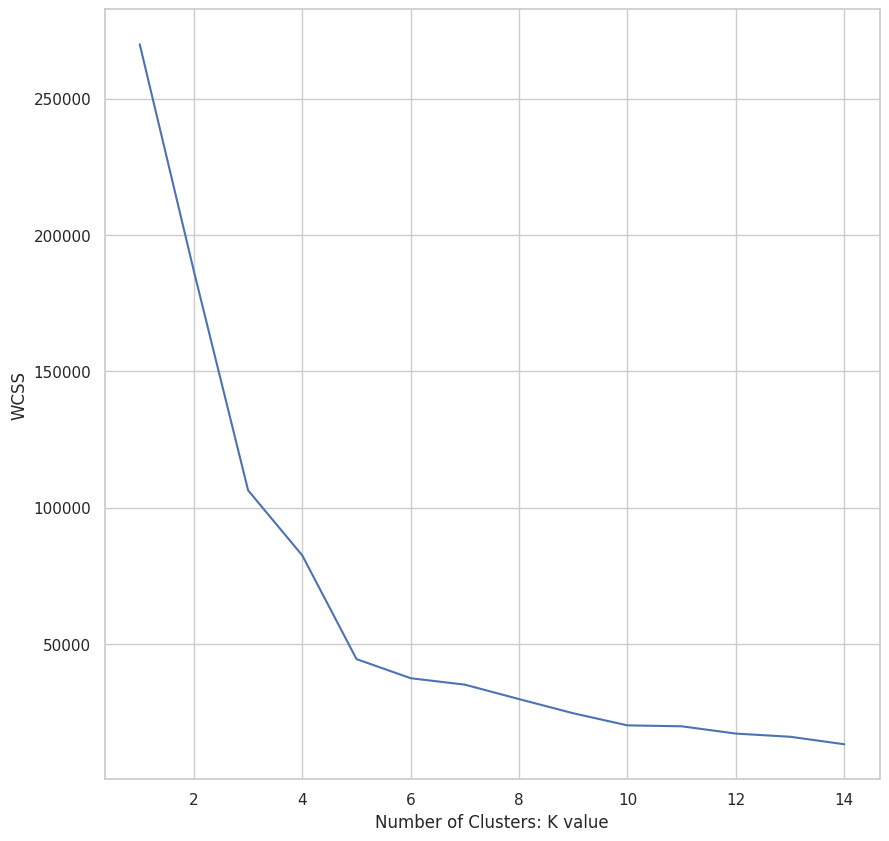

In [ ]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1,15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1,15), wcss)
plt.xlabel("Number of Clusters: K value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Si alejas la vista de esta curva, verás que el último codo ocurre en k=5.
# No importa el rango que seleccionemos, por ejemplo, (1,21), veremos el mismo comportamiento,
# pero si elegimos un rango mayor, será un poco más difícil visualizar el codo.
# Por eso, generalmente preferimos un rango (1,11).
## Finalmente, hemos determinado que k=5.
# Crear el modelo de KMeans con 5 clústeres
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Ajustar el modelo a los datos y predecir a qué clúster pertenece cada punto
y_kmeans = kmeansmodel.fit_predict(X)

# Para el aprendizaje no supervisado usamos "fit_predict()", mientras que en el aprendizaje supervisado usamos "fit_transform()".
# "y_kmeans" es el modelo final. Ahora, cómo y dónde implementaremos este modelo en producción depende de las herramientas que estemos utilizando.
# Este caso de uso es muy común en la industria BFS (tarjetas de crédito) y en retail para segmentación de clientes.


Visualizando los clusters

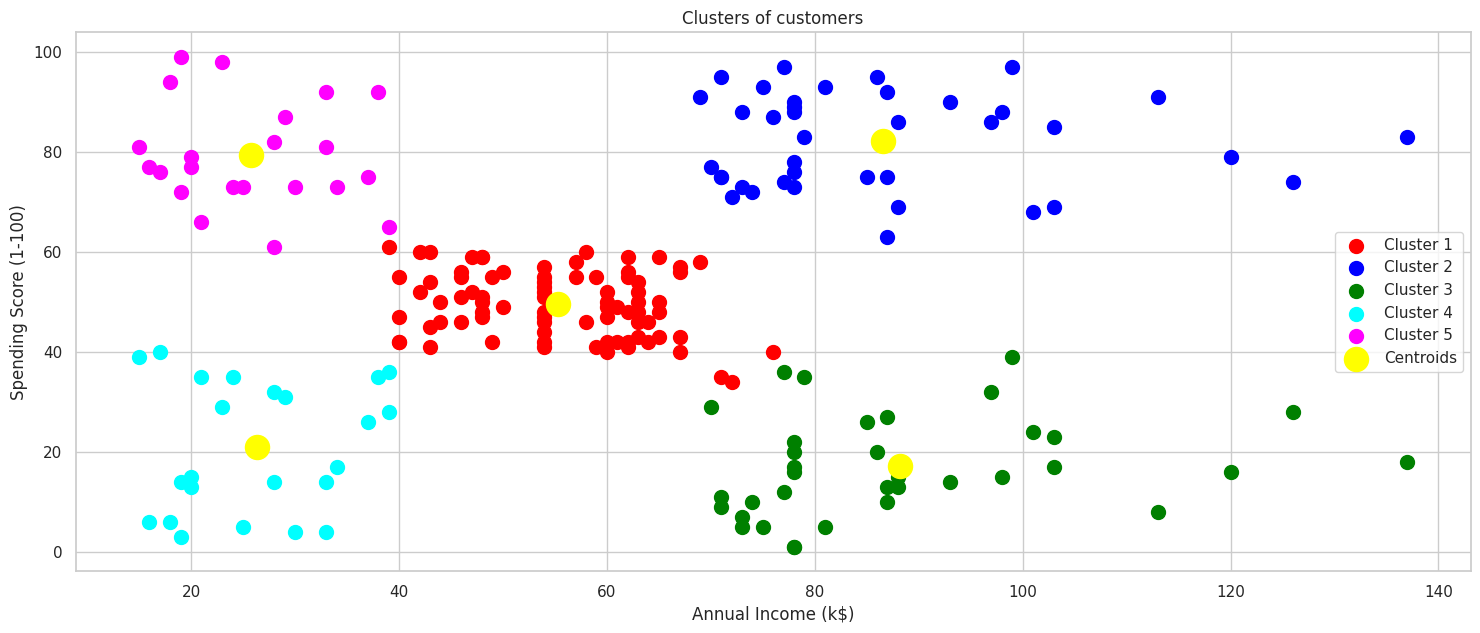

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

 Este análisis de agrupamiento nos brinda una visión muy clara sobre los diferentes segmentos de los clientes en el centro comercial.

Claramente hay cinco segmentos de clientes, a saber: **Cluster 1**, **Cluster 2**, **Cluster 3**, **Cluster 4**, y **Cluster 5**, basados en sus **Ingresos Anuales** y **Puntuación de Gasto**, que son los factores/atributos considerados como los mejores para determinar los segmentos de un cliente en un centro comercial.

### Interpretación del Modelo:

- **Cluster 1 (Color Rojo)**: Ganancia alta pero gasto bajo.
- **Cluster 2 (Color Azul)**: Promedio en cuanto a ingresos y gasto.
- **Cluster 3 (Color Verde)**: Ganancia alta y también gasto alto
- **Cluster 4 (Color Cian)**: Ganancia baja pero gasto alto.
- **Cluster 5 (Color Magenta)**: Ganancia baja, gasto bajo.

Podemos poner el **Cluster 3** en un sistema de alertas donde se les pueda enviar correos electrónicos diariamente, ya que estos son fáciles de contactar y potencialmente tienen un alto valor para el negocio.

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el índice de la silueta
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Índice de la silueta: {silhouette_avg}')


Índice de la silueta: 0.553931997444648


El índice de la silueta de 0.55 indica que el modelo de KMeans con 5 clústeres está proporcionando una segmentación bastante buena, pero hay margen de mejora.

Interpretación del valor de 0.55:
0.55 es un valor positivo, lo que significa que los clústeres están relativamente bien definidos.
Aunque el valor no es cercano a 1 (lo cual sería ideal), 0.55 aún sugiere que los puntos están agrupados de manera decente, sin estar excesivamente mezclados con otros clústeres.
Si deseas mejorar la calidad del clustering, podrías intentar:



In [ ]:
from sklearn.mixture import GaussianMixture

# Crear el modelo de mezcla gaussiana
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0)

# Ajustar el modelo a los datos
gmm.fit(X)

# Predecir las etiquetas de los clústeres
y_gmm = gmm.predict(X)

# Ver los parámetros aprendidos del modelo
print(f'Medias de los componentes: {gmm.means_}')
print(f'Covarianzas de los componentes: {gmm.covariances_}')


Medias de los componentes: [[55.710366   49.40699488]
 [86.24063303 82.02037464]
 [88.81300265 16.12462277]
 [27.03119094 22.16675827]
 [25.11748524 80.12817162]]
Covarianzas de los componentes: [[[ 91.30433204 -27.72981079]
  [-27.72981079  49.57883428]]

 [[269.17653884  -3.71789734]
  [ -3.71789734  87.93249987]]

 [[270.64185693  51.86522788]
  [ 51.86522788  83.84017214]]

 [[ 67.4158727   30.53552174]
  [ 30.53552174 184.24032515]]

 [[ 50.21507292  -1.71743151]
  [ -1.71743151  98.53604804]]]


In [ ]:
from sklearn.metrics import silhouette_score

# Índice de la silueta para KMeans
silhouette_avg_kmeans = silhouette_score(X, y_kmeans)
print(f'Índice de la silueta para KMeans: {silhouette_avg_kmeans}')

# Índice de la silueta para GMM
silhouette_avg_gmm = silhouette_score(X, y_gmm)
print(f'Índice de la silueta para GMM: {silhouette_avg_gmm}')


Índice de la silueta para KMeans: 0.553931997444648
Índice de la silueta para GMM: 0.5528243704895652


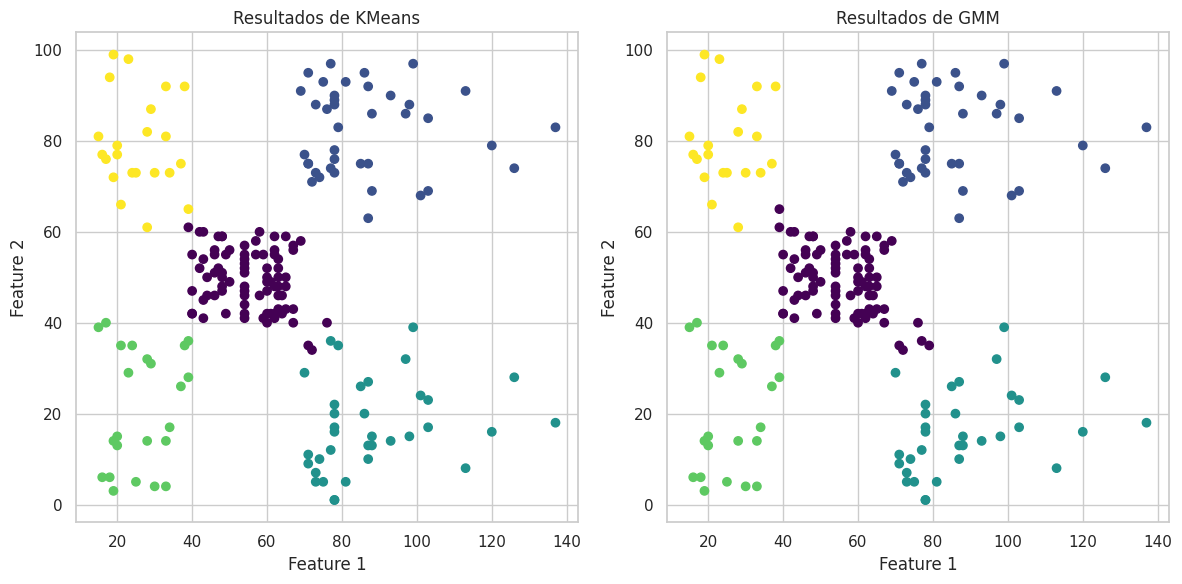

In [ ]:
import matplotlib.pyplot as plt

# Visualizar los resultados de KMeans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Resultados de KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualizar los resultados de GMM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
plt.title('Resultados de GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
#Generar etiquetas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Usaremos las etiquetas de clúster generadas por KMeans
# X es el conjunto de características (por ejemplo, Edad, Ingreso Anual, Puntuación de Gasto)
# y_kmeans son las etiquetas de los clústeres generadas por KMeans
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size=0.3, random_state=0)

# Crear el modelo de clasificador
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = classifier.predict(X_test)

# Evaluar el clasificador
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Report de clasificación:\n{classification_report(y_test, y_pred)}')


Accuracy: 0.9666666666666667
Report de clasificación:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00        12
           2       1.00      0.85      0.92        13
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5

    accuracy                           0.97        60
   macro avg       0.98      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



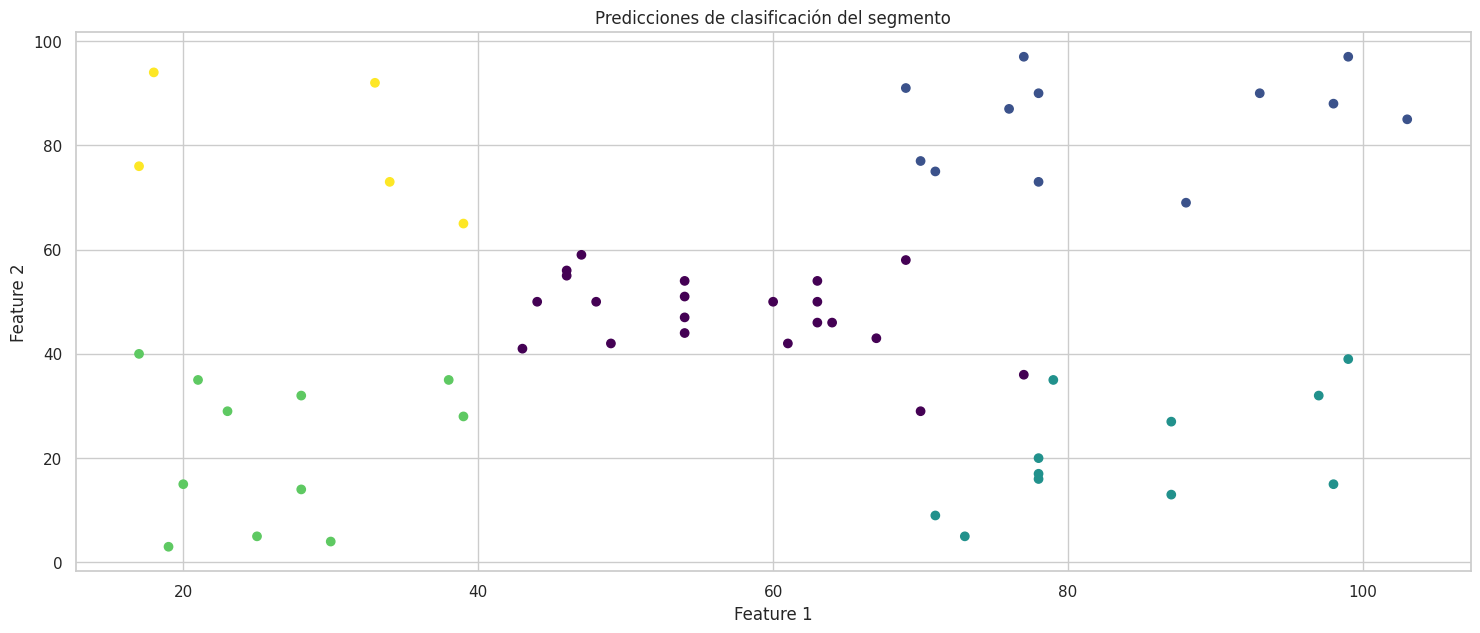

In [ ]:
import matplotlib.pyplot as plt

# Visualizar las predicciones del clasificador
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.title('Predicciones de clasificación del segmento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

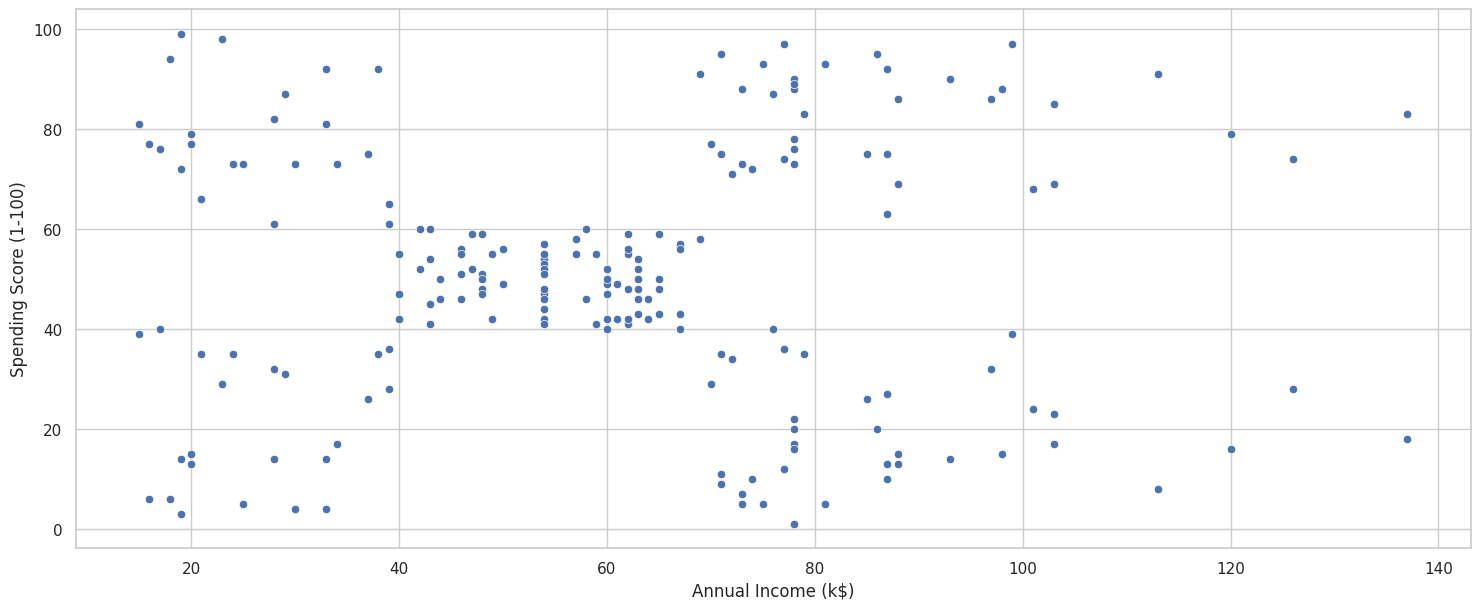

In [ ]:
sns.scatterplot(data=data, x='Annual Income (k$)',y='Spending Score (1-100)' )